In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import gc

C:\Users\kimay\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# target variable >> outcome >>  1 >>Not Diebetes
#                                  0 >> Diebetes

In [4]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

In [5]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

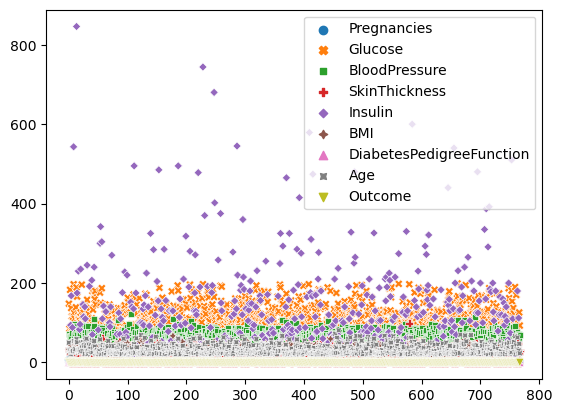

In [7]:
sns.scatterplot(df)

<Axes: >

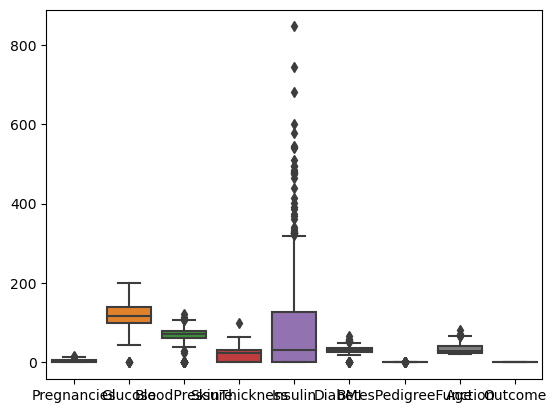

In [8]:
sns.boxplot(df)

In [9]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

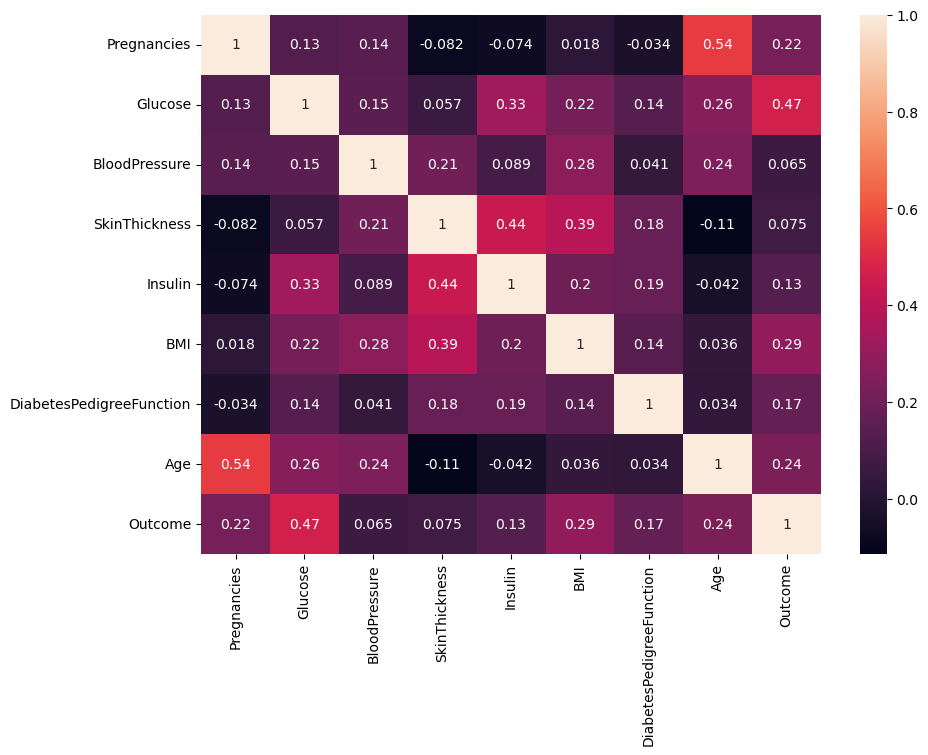

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

In [11]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22,stratify=y)

In [14]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=15,min_samples_leaf=16,max_features=100)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=100,
                       min_samples_leaf=16, min_samples_split=15)

In [15]:
y_pred=model.predict(x_test)
y_test

600    0
111    1
45     1
114    1
296    1
      ..
21     0
55     0
562    0
120    1
561    1
Name: Outcome, Length: 154, dtype: int64

In [16]:
accuracy_score(y_pred,y_test)

0.7792207792207793

In [17]:
# Training accuracy
y_pred_train=model.predict(x_train)
y_train

23     1
693    1
143    1
113    0
527    0
      ..
548    0
42     0
166    0
547    0
421    0
Name: Outcome, Length: 614, dtype: int64

In [18]:
accuracy_score(y_pred_train,y_train)

0.8273615635179153

# Using RandomizedSearchCv

In [19]:
model_1=DecisionTreeClassifier()
model_1.fit(x_train,y_train)

DecisionTreeClassifier()

In [20]:
hyp_para={'criterion':['gini','entropy'],
         'max_depth':np.arange(1,100),
         'min_samples_split':np.arange(1,100),
         'min_samples_leaf':np.arange(1,100),
         'max_features':np.arange(1,500)}

dt_model=DecisionTreeClassifier()
gdscv_model=RandomizedSearchCV(dt_model,hyp_para,cv=5)
gdscv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 7...
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [21]:
gdscv_model.best_params_

{'min_samples_split': 82,
 'min_samples_leaf': 43,
 'max_features': 250,
 'max_depth': 81,
 'criterion': 'entropy'}

In [22]:
model_1=DecisionTreeClassifier(criterion='entropy',max_depth=51,min_samples_split=11,min_samples_leaf=24,max_features=47)
model_1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=51, max_features=47,
                       min_samples_leaf=24, min_samples_split=11)

In [23]:
y_pred_1=model_1.predict(x_test)
y_test

600    0
111    1
45     1
114    1
296    1
      ..
21     0
55     0
562    0
120    1
561    1
Name: Outcome, Length: 154, dtype: int64

In [24]:
accuracy_score(y_pred_1,y_test)

0.8116883116883117

In [25]:
y_pred_train_1=model_1.predict(x_train)
y_train

23     1
693    1
143    1
113    0
527    0
      ..
548    0
42     0
166    0
547    0
421    0
Name: Outcome, Length: 614, dtype: int64

In [26]:
accuracy_score(y_pred_train_1,y_train)

0.8013029315960912